<a href="https://colab.research.google.com/github/CelesTech03/Data-Analytics-Winter-2022/blob/main/Python/Assignments/Iris_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
# Reading in the data
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv')

In [253]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [255]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [256]:
# Removing Id since it doesn't tell us anything useful
df.drop('Id', axis = 1, inplace=True)

In [257]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [258]:
# Importing StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [259]:
# Assigning the StandardScaler function to our new variable (scalar)
scalar = StandardScaler()

In [260]:
# Dropping our predictor 'Species' from the df
# Training my scalar variable to learn about the original dataset without Species
scalar.fit(df.drop('Species', axis = 1))

StandardScaler()

In [261]:
# Scaled the features which contrain Sepeal Length , Width, Petal Length, Width
scaled_features = scalar.transform(df.drop('Species', axis = 1))

In [262]:
# Creating a new DataFrame without the Species column and scaled features
df_feature = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [263]:
df_feature.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [264]:
# Import train test split
from sklearn.model_selection import train_test_split
# Splitting the data 30% testing, 70% training
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Species'], test_size = 0.3)

In [265]:
# Import KNN Classfiier
from sklearn.neighbors import KNeighborsClassifier

In [266]:
# Setting KNN Classifier to nearest neighbors 1 and saving it to knn var
knn = KNeighborsClassifier(n_neighbors = 1)

In [267]:
# Fitting a model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [268]:
# Running predictions on X_test (testing data)
predict = knn.predict(X_test)

In [269]:
# Prints array of predictions
predict

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

In [270]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [271]:
# Creating a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [272]:
print(confusion_matrix(y_test, predict))

[[16  1  0]
 [ 0 15  0]
 [ 0  2 11]]


In [273]:
# Creating list for x-axis and y-axis label on sns.heatmeap
class_names = ['Setosa', 'Virginica','Versicolor']

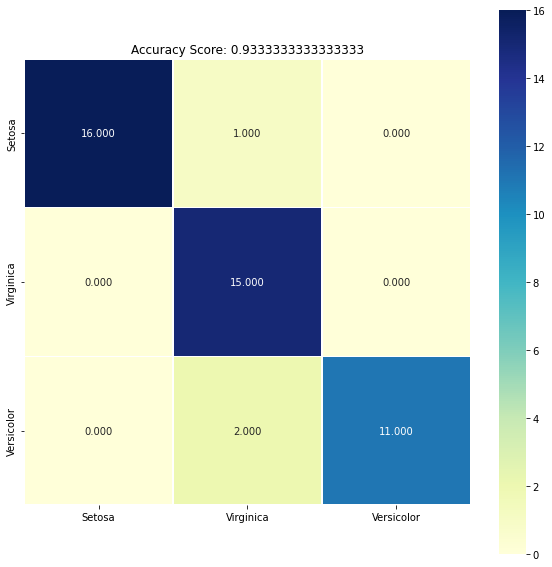

In [274]:
# Plotting confusion matrix for better interpretation
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = '.3f', linewidths= .5, 
            square = True, cmap = 'YlGnBu', xticklabels = class_names, yticklabels = class_names)
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test, y_test)}'
plt.title(all_sample_title, size = 12);

In [275]:
# Printing classification report on y_testing and prediction variable
# here we see the precision, recall and f1 score, along with accuracy
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.94      0.97        17
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



# Insight on k = 1
Setosa is 0 on the x-axis. 
Versicolor is 1 on the x-axis.
Virginica is 2 on the x-axis.

At K = 1 the machine learning model was able to predict with 100% the plants
that should have been sestosa. We had a 83% accuracy on identifying the Versicolor plant. Finally, we had a 100% accuracy on the Virginica plant.
We don't really need to go past k = 1 to see great results.

This is also telling us that, just with the length and width of the Sepal and the Pedal, a machine is able to identify a plant. It doesn't need color, if it is a plant, or any other attributes to successfuly identify in this dataset.

## Repeat above steps for K = 5, see what happens with accuracy

In [276]:
# Setting knn to 5 neighbors
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [277]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [278]:
predict2 = knn5.predict(X_test)

In [279]:
print(confusion_matrix(y_test, predict2))

[[17  0  0]
 [ 0 15  0]
 [ 0  2 11]]


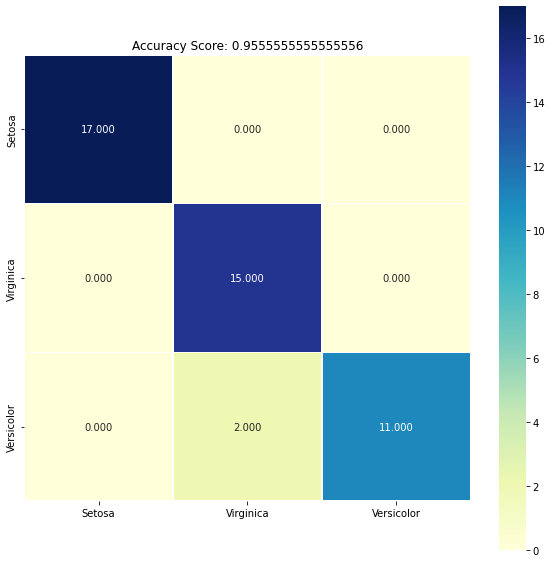

In [280]:
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, predict2), annot = True, fmt = '.3f', linewidths= .5, 
            square = True, cmap = 'YlGnBu', xticklabels = class_names,yticklabels = class_names)
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score: {knn5.score(X_test, y_test)}'
plt.title(all_sample_title, size = 12);

In [281]:
print(classification_report(y_test, predict2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



# K Value and accuracy

In [282]:
from sklearn import metrics

In [283]:
score = []

In [284]:
# Running KNN from 1 to 40 for nearest neighbors and seeing the scores for accuracy
# storing these results in the score variable
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8666666666666667]


## K values 1 - 39

We see the accuracy is pretty much not changing from k=6 to k=33
But there is an interesting anamoly that occurs after k=33.
The accuracy begins to decrease. This may be due to the amount of neighbors that
a plant can be grouped with. A reason could also be that the model is beginning to underfit the data, meaning it is interpreting the data too loosely.

TypeError: ignored

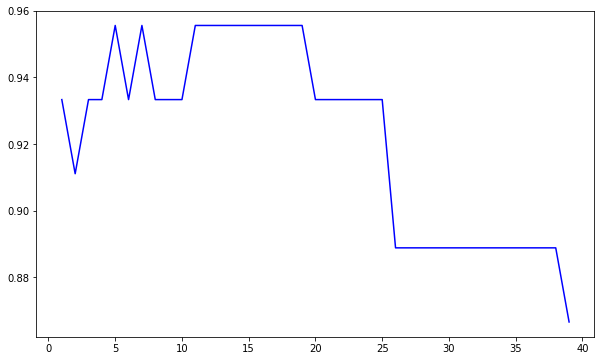

In [288]:
# Creating a plot to see how the K value affects accuracy
# from K values 1 to 39
plt.figure(figsize=(10,6))
plt.plot(range(1,40),score, color = 'blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Error rate

In [289]:
# Running KNN from 1 to 40 for nearest neighbors and seeing the error rate
# storing these results in the error_rate variable
error_rate = []
# Might take some time
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

TypeError: ignored

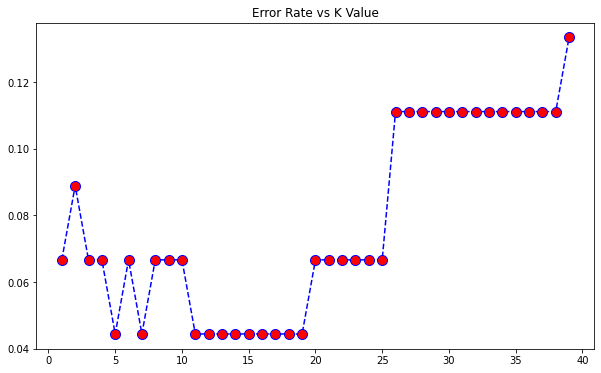

In [290]:
# Plotting the error rate to see how it interacts with the 
# previous chart which shows accuracy
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker = 'o',
         markerfacecolor='red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')